## Observations and Insights 

In [2]:
print("Looking at the summary statistics table, the treatments Capomulin and Ramicane were found to have the lowest standard deviation as well as the smallest SEM (standard of error). When comparing the 4 drug regimens, the data shows that the upper and lower quartile  were similar for both Capomulin and Ramicane; making them the lowest numbers in comparison to the other 2 drugs. The data is visually displayed by the box plot and shows that both Capomulin and Ramicane were closest to the mean in comparison to Ceftamin and Ifubinol. Overall, both these medications show that they are the most successful treatments in treating the tumors.")

Looking at the summary statistics table, the treatments Capomulin and Ramicane were found to have the lowest standard deviation as well as the smallest SEM (standard of error). When comparing the 4 drug regimens, the data shows that the upper and lower quartile  were similar for both Capomulin and Ramicane; making them the lowest numbers in comparison to the other 2 drugs. The data is visually displayed by the box plot and shows that both Capomulin and Ramicane were closest to the mean in comparison to Ceftamin and Ifubinol. Overall, both these medications show that they are the most successful treatments in treating the tumors.


In [3]:
print("When comparing all 4 drug regiments, Ifubinol was the least effective drug to treat tumors. The upper and lower quartiles were the greatest in comparison to the other drugs and the box plot showed that this particular regimen was furthest from the mean. The box plot also showed an obvious outlier that indicates that this specific drug was not successful in treating the tumor. ")

When comparing all 4 drug regiments, Ifubinol was the least effective drug to treat tumors. The upper and lower quartiles were the greatest in comparison to the other drugs and the box plot showed that this particular regimen was furthest from the mean. The box plot also showed an obvious outlier that indicates that this specific drug was not successful in treating the tumor. 


In [4]:
print("After extracting specific data for Capomulin, the conclusion is that this particular treatment was incredibly effective in treating tumors. This conclusion is based on the correlation and regression for mouse weight vs average tumor volume. The correlation between both factors was 0.83, which is near 1 showing that this is a strong correlation. This correlation proves that weight of mice is a good indicator of tumor volume. The r squared is also near 0.7 which shows a good indication for high level of correlation.")

After extracting specific data for Capomulin, the conclusion is that this particular treatment was incredibly effective in treating tumors. This conclusion is based on the correlation and regression for mouse weight vs average tumor volume. The correlation between both factors was 0.83, which is near 1 showing that this is a strong correlation. This correlation proves that weight of mice is a good indicator of tumor volume. The r squared is also near 0.7 which shows a good indication for high level of correlation.


In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#used to check on which column I can merge
# mouse_metadata.head()
# study_results.head()

# Combine the data into a single dataset
# Display the data table for preview
combined_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [71]:
#Checking the number of mice.

len(combined_data_df["Mouse ID"].value_counts())

249

In [72]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df[combined_data_df.duplicated(['Mouse ID', 'Timepoint'])]
#duplicate_mice = combined_data_df.sort_values(by=['Mouse ID'],ascending=False) * 1893 rows x8 columns
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [73]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = combined_data_df[combined_data_df.duplicated(['Mouse ID'])]
duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mice_df = duplicate_mouse_id
clean_mice_df = clean_mice_df.drop_duplicates(["Mouse ID", "Timepoint"])
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [75]:
# Checking the number of mice in the clean DataFrame.

len(clean_mice_df["Mouse ID"].value_counts())


237

## Summary Statistics

In [76]:
# summary_count = pd.DataFrame(clean_mice_df.groupby("Drug Regimen").count())
# summary_count

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_statistics = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
summary_count = clean_mice_df.groupby("Drug Regimen").count()

drug_mean = summary_statistics.mean()
drug_median = summary_statistics.median()
drug_varience = summary_statistics.var()
drug_std = summary_statistics.std()
drug_sem = summary_statistics.sem()

summary_statistics_df = pd.DataFrame(
    {"Mean": drug_mean, 
     "Median": drug_median, 
     "Variance": drug_varience, 
     "Standard Deviation": drug_std, 
     "SEM": drug_sem 
    })
summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.148392,40.716428,25.434058,5.043219,0.352234
Ceftamin,53.831559,52.847559,34.725752,5.892856,0.476409
Infubinol,54.173160,53.244458,38.326085,6.190806,0.500497
Ketapril,56.805521,56.098998,60.485143,7.777219,0.609159
Naftisol,55.780565,54.234502,60.794406,7.797077,0.614496
Placebo,55.481270,53.354528,55.762387,7.467422,0.597872
Propriva,53.737729,52.663801,39.206600,6.261517,0.544995
Ramicane,39.627674,39.769552,23.213127,4.818000,0.338157
Stelasyn,55.644586,54.328317,53.476333,7.312751,0.583621


In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stats_agg = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
summary_stats_agg = stats_agg.agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.148392,40.716428,25.434058,5.043219,0.352234
Ceftamin,53.831559,52.847559,34.725752,5.892856,0.476409
Infubinol,54.173160,53.244458,38.326085,6.190806,0.500497
Ketapril,56.805521,56.098998,60.485143,7.777219,0.609159
Naftisol,55.780565,54.234502,60.794406,7.797077,0.614496
Placebo,55.481270,53.354528,55.762387,7.467422,0.597872
Propriva,53.737729,52.663801,39.206600,6.261517,0.544995
Ramicane,39.627674,39.769552,23.213127,4.818000,0.338157
Stelasyn,55.644586,54.328317,53.476333,7.312751,0.583621


## Bar and Pie Charts

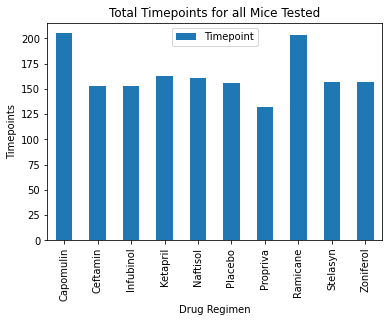

<Figure size 432x288 with 0 Axes>

In [79]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

new_mice = clean_mice_df.groupby('Drug Regimen')['Timepoint'].count()
new_mice_df = pd.DataFrame(new_mice)
# new_mice_df
new_mice_df.plot(kind="bar", title="Total Timepoints for all Mice Tested")
plt.ylabel("Timepoints")
plt.show()
plt.tight_layout()

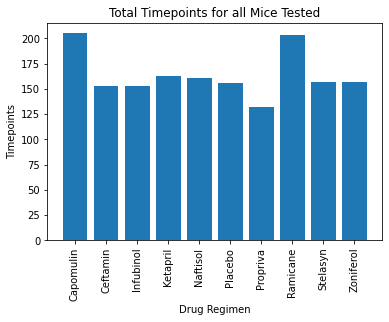

In [80]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(new_mice))
regimen_list = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn',
 'Zoniferol']

tick_locations = [x for x in x_axis]

plt.bar(x_axis, new_mice_df['Timepoint'], alpha=1, align="center")
plt.xticks(tick_locations, regimen_list, rotation="vertical")


plt.title("Total Timepoints for all Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

plt.show()



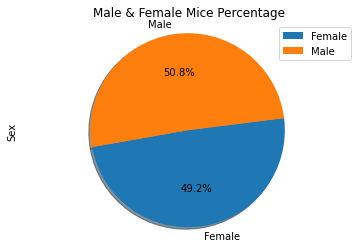

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#checked data frame first to ensure I was making the correct pie plot
gender = clean_mice_df.groupby("Sex")
gender_df = pd.DataFrame(gender['Sex'].count())
# gender_df

gender_df.plot(kind="pie", y = 'Sex', autopct='%1.1f%%',
              startangle=190, shadow=True, title=("Male & Female Mice Percentage"))
plt.axis("equal")
plt.show()

(-1.1875029590174364,
 1.110553372662429,
 -1.1938975454118226,
 1.112126219631456)

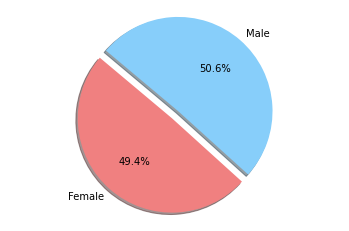

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [49.4, 50.6]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Female" section from others
explode = (0.1, 0)

#creates the pie chart based upon the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#tells matplotlib that we want a piie chart with equal axes
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [83]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

timepoints_max = clean_mice_df.groupby(['Mouse ID'])['Timepoint'].max()
# timepoints_max-to check that it worked
new_tumor_timepoint = pd.merge(timepoints_max, clean_mice_df, on=(["Mouse ID", "Timepoint"]))
new_tumor_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
232,z435,10,Propriva,Female,12,26,48.710661,0
233,z578,45,Ramicane,Male,11,16,30.638696,0
234,z581,45,Infubinol,Female,24,25,62.754451,3
235,z795,45,Naftisol,Female,13,29,65.741070,3


In [103]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
drugs= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_volume = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
     # Locate the rows which contain mice on each drug and get the tumor volumes
     # add subset 
     # Determine outliers using upper and lower bounds
for treatment in drugs:
    drug_regimen = new_tumor_timepoint.loc[new_tumor_timepoint["Drug Regimen"] == treatment]
    volume = drug_regimen['Tumor Volume (mm3)']
    tumor_volume.append(volume)
    
    
quartile_capomulin = tumor_volume[0].quantile([.25,.5,.75])
lowerq_capomulin = quartile_capomulin[0.25]
upperq_capomulin = quartile_capomulin[0.75]
IQR_capomulin = upperq_capomulin-lowerq_capomulin

quartile_ramicane = tumor_volume[1].quantile([.25,.5,.75])
lowerq_ramicane = quartile_ramicane[0.25]
upperq_ramicane = quartile_ramicane[0.75]
IQR_ramicane = upperq_ramicane-lowerq_ramicane

quartile_infubinol = tumor_volume[2].quantile([.25,.5,.75])
lowerq_infubinol = quartile_infubinol[0.25]
upperq_infubinol = quartile_infubinol[0.75]
IQR_infubinol = upperq_infubinol-lowerq_infubinol

quartile_ceftamin = tumor_volume[3].quantile([.25,.5,.75])
lowerq_ceftamin = quartile_ceftamin[0.25]
upperq_ceftamin = quartile_ceftamin[0.75]
IQR_ceftamin = upperq_ceftamin-lowerq_ceftamin
    
#Determine outliers using upper and lower bounds
lb_capomulin = lowerq_capomulin - (1.5*IQR_capomulin)
ub_capomulin = upperq_capomulin + (1.5*IQR_capomulin)

lb_ramicane = lowerq_ramicane - (1.5*IQR_ramicane)
ub_ramicane = upperq_ramicane + (1.5*IQR_ramicane)

lb_infubinol = lowerq_infubinol - (1.5*IQR_infubinol)
ub_infubinol = upperq_infubinol + (1.5*IQR_infubinol)

lb_ceftamin  = lowerq_ceftamin - (1.5*IQR_ceftamin)
ub_ceftamin  = upperq_ceftamin + (1.5*IQR_ceftamin)


print(f"{drugs[0]}: Values below {lb_capomulin} and above {ub_capomulin} could be potential outliers")
print(f"{drugs[1]}: Values below {lb_ramicane} and above {ub_ramicane} could be potential outliers")
print(f"{drugs[2]}: Values below {lb_infubinol} and above {ub_infubinol} could be potential outliers")
print(f"{drugs[3]}: Values below {lb_ceftamin} and above {ub_ceftamin} could be potential outliers")
    

Capomulin: Values below 20.70456164999999 and above 51.83201549 could be potential outliers
Ramicane: Values below 17.912664470000003 and above 54.30681135 could be potential outliers
Infubinol: Values below 36.83290494999999 and above 82.74144559000001 could be potential outliers
Ceftamin: Values below 43.19194942 and above 77.50074854 could be potential outliers


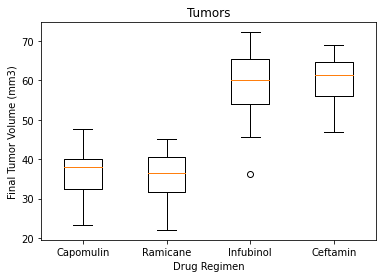

In [102]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Tumors")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")

ax1.boxplot(tumor_volume, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

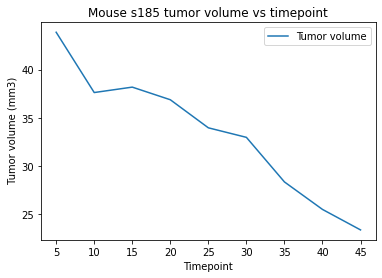

In [101]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_tx = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin"]
#capomulin_tx-used this to check and choose mouse. will choose mouse id s185
s185 = clean_mice_df.loc[clean_mice_df["Mouse ID"] == "s185"]

x_axis = s185["Timepoint"]
y_axis = s185["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, label="Tumor volume")
plt.legend(loc="best")

plt.title( "Mouse s185 tumor volume vs timepoint")
plt.xlabel("Timepoint")
plt.ylabel(" Tumor volume (mm3)")

plt.show()

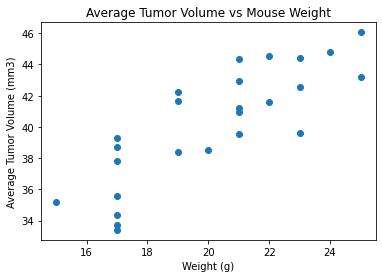

In [100]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# capomulin_tx = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin"]
# capomulin_tx

capomulin_avg = capomulin_tx.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between both factors is 0.83
The r-squared is: 0.6813028123867435
y = 1.06x + 18.8


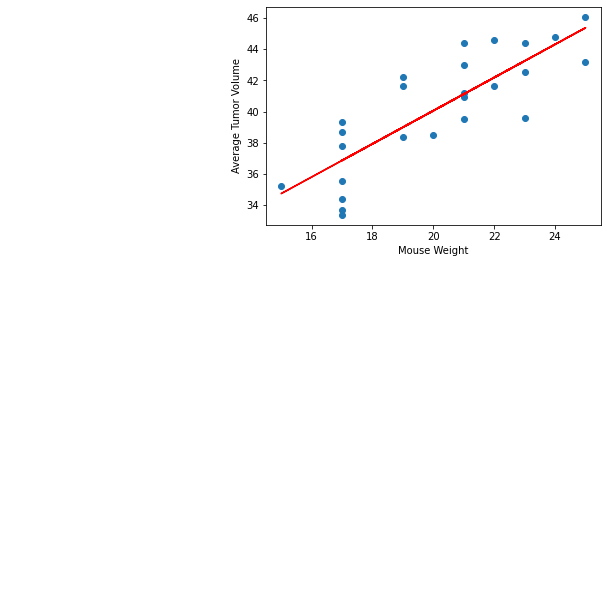

In [99]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation
correlation = st.pearsonr(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

#linear regression
x_values = capomulin_avg["Weight (g)"]
y_values = capomulin_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

